# Caterpillar latency comparison

These charts compare per-hop latency and end-to-end latency across four systems.
All durations are converted to microseconds (us). Plots use a log scale to show the
ns to ms range.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")


In [2]:
raw_tables = {
    "Copper (Full determinism)": """
Task          Min           Max         Mean       Stddev     Jitter      Max Jitter
src           9 ns         23.041 us    13 ns      19 ns      5 ns        23.031 us
ct-0          0 ns         16.193 us     6 ns      13 ns      4 ns        16.193 us
gpio-0        0 ns         34.756 us     6 ns      14 ns      4 ns        34.755 us
ct-1          0 ns         35.496 us     6 ns      16 ns      4 ns        35.496 us
gpio-1        0 ns         15.233 us     6 ns      11 ns      4 ns        15.233 us
ct-2          0 ns         20.621 us     6 ns      15 ns      4 ns        20.611 us
gpio-2        0 ns         14.514 us     6 ns      10 ns      4 ns        14.514 us
ct-3          0 ns         26.080 us     6 ns      15 ns      4 ns        26.071 us
gpio-3        0 ns          7.008 us     6 ns       9 ns      4 ns         6.998 us
ct-4          0 ns         33.777 us     6 ns      16 ns      4 ns        33.776 us
gpio-4        0 ns         14.244 us     6 ns      10 ns      4 ns        14.244 us
ct-5          0 ns         18.352 us     6 ns      15 ns      4 ns        18.342 us
gpio-5        0 ns         17.163 us     6 ns      12 ns      4 ns        17.153 us
ct-6          0 ns         34.556 us     6 ns      14 ns      4 ns        34.556 us
gpio-6        0 ns         16.063 us     6 ns      11 ns      4 ns        16.063 us
ct-7          0 ns         38.995 us     6 ns      17 ns      4 ns        38.986 us
gpio-7        0 ns         28.249 us     6 ns      14 ns      4 ns        28.240 us
End2End     200 ns         39.215 us   218 ns      73 ns      7 ns        38.995 us

""",
    "ROS2 Jazzy (Non-deterministic logging)": """
Task            Min         Max        Mean      Stddev      Jitter  Max Jitter
src        9.640 us  109.382 us   39.887 us   14.000 us   12.896 us   73.961 us
ct-0      33.870 us  200.652 us  118.628 us   39.627 us   37.286 us  145.231 us
gpio-0    36.481 us  179.183 us  112.441 us   36.312 us   34.283 us  112.872 us
ct-1      38.330 us  195.153 us  114.098 us   34.291 us   32.761 us  117.882 us
gpio-1    33.331 us  186.943 us  115.215 us   34.760 us   32.096 us  119.911 us
ct-2      49.851 us  187.203 us  127.321 us   37.011 us   34.523 us  123.021 us
gpio-2    49.080 us  227.773 us  116.513 us   33.809 us   32.018 us  104.222 us
ct-3      53.601 us  201.662 us  117.278 us   34.520 us   32.005 us  112.642 us
gpio-3    44.470 us  165.552 us  104.015 us   27.142 us   24.574 us   95.052 us
ct-4      53.880 us  171.622 us  113.354 us   30.828 us   26.051 us  100.452 us
gpio-4    45.360 us  157.232 us   98.470 us   25.799 us   24.251 us   75.520 us
ct-5      57.451 us  165.253 us  110.800 us   26.610 us   25.607 us   83.361 us
gpio-5    43.031 us  189.073 us   98.054 us   29.255 us   26.550 us  122.702 us
ct-6      51.251 us  222.393 us  106.866 us   30.459 us   27.673 us   99.251 us
gpio-6    35.740 us  156.332 us   94.196 us   29.924 us   26.729 us   92.701 us
ct-7      36.560 us  171.342 us   98.403 us   30.115 us   28.064 us  123.923 us
gpio-7    40.851 us  140.922 us   94.233 us   23.581 us   23.390 us   86.100 us
End2End  489.747 us    1.363 ms    1.001 ms  266.350 us  244.091 us  770.909 us
""",
    "Dora-rs (Non-deterministic)": """
Task            Min         Max        Mean     Stddev     Jitter  Max Jitter
src       12.473 us  138.856 us   27.583 us   7.937 us   7.367 us  113.012 us
ct-0      23.050 us  232.393 us   38.916 us   9.426 us   7.147 us  200.693 us
gpio-0    23.410 us  229.243 us   36.884 us   7.607 us   6.006 us  188.513 us
ct-1      24.230 us  230.773 us   38.940 us   7.827 us   5.925 us  198.453 us
gpio-1    22.691 us  221.653 us   37.871 us   7.613 us   6.271 us  188.073 us
ct-2      25.291 us  231.763 us   40.015 us   7.644 us   6.093 us  189.803 us
gpio-2    21.540 us  185.332 us   38.238 us   8.569 us   6.510 us  145.932 us
ct-3      25.751 us  186.022 us   40.595 us   8.568 us   6.522 us  140.741 us
gpio-3    22.191 us  192.583 us   38.282 us   9.192 us   6.693 us  158.373 us
ct-4      24.830 us  198.073 us   40.413 us   9.129 us   6.601 us  162.022 us
gpio-4    22.541 us  191.303 us   37.903 us   8.023 us   6.480 us  157.532 us
ct-5      24.730 us  194.512 us   40.259 us   8.250 us   6.428 us  153.441 us
gpio-5    21.250 us  182.382 us   37.718 us   8.061 us   6.490 us  152.132 us
ct-6      24.121 us  157.732 us   39.902 us   7.953 us   6.458 us  121.792 us
gpio-6    20.870 us  139.071 us   37.288 us   7.741 us   6.436 us  108.250 us
ct-7      23.641 us  142.061 us   39.581 us   8.026 us   6.685 us  112.720 us
gpio-7    22.860 us  395.534 us   38.793 us   9.949 us   6.704 us  352.914 us
End2End  262.093 us  737.848 us  357.926 us  43.518 us  30.188 us  377.285 us
""",
    "Horus (Deterministic)": """
Task            Min         Max        Mean     Stddev     Jitter  Max Jitter
src        1.220 us   27.061 us    8.272 us   4.609 us   4.063 us   24.080 us
ct-0       9.721 us  146.672 us   46.122 us  21.992 us  20.485 us  127.672 us
gpio-0     8.030 us   57.831 us   15.542 us   4.239 us   3.148 us   48.431 us
ct-1      15.890 us   88.622 us   29.116 us   6.739 us   5.514 us   71.131 us
gpio-1     7.650 us   29.750 us   13.091 us   3.017 us   2.645 us   18.889 us
ct-2      15.470 us   63.011 us   31.515 us   8.953 us   7.282 us   31.550 us
gpio-2     7.320 us   23.930 us   12.511 us   2.303 us   2.220 us   12.500 us
ct-3      14.650 us   39.570 us   25.065 us   4.301 us   4.245 us   16.880 us
gpio-3    15.110 us   49.191 us   26.559 us   5.274 us   4.954 us   25.340 us
ct-4       8.290 us   37.240 us   16.010 us   4.254 us   2.972 us   25.350 us
gpio-4    13.740 us   41.741 us   23.890 us   4.413 us   4.082 us   21.011 us
ct-5      21.210 us   59.641 us   36.434 us   6.586 us   6.296 us   27.211 us
gpio-5     7.570 us   19.650 us   12.732 us   2.223 us   2.207 us    7.891 us
ct-6      15.511 us   50.881 us   27.572 us   6.017 us   5.496 us   21.660 us
gpio-6    14.800 us   50.081 us   26.643 us   5.679 us   4.614 us   21.921 us
ct-7       7.930 us   16.660 us   13.347 us   2.195 us   2.164 us    7.150 us
gpio-7    14.060 us   48.521 us   25.491 us   5.824 us   4.777 us   22.411 us
End2End  130.702 us  429.196 us  252.409 us  55.615 us  54.088 us  289.394 us
""",
}


def to_us(value, unit):
    unit = unit.lower()
    if unit == "ns":
        return value / 1000.0
    if unit in ("us", "µs", "uµs"):
        return value
    if unit == "ms":
        return value * 1000.0
    raise ValueError(f"unknown unit: {unit}")


def parse_table(text, system):
    rows = []
    for line in text.strip().splitlines():
        line = line.strip()
        if not line or line.startswith("Task"):
            continue
        tokens = line.split()
        if len(tokens) < 13:
            raise ValueError(f"unexpected row format: {line}")
        task = tokens[0]
        values = tokens[1:]
        names = ["min", "max", "mean", "stddev", "jitter", "max_jitter"]
        metrics = {}
        for i, name in enumerate(names):
            val = float(values[i * 2])
            unit = values[i * 2 + 1]
            metrics[f"{name}_us"] = to_us(val, unit)
        rows.append({"system": system, "task": task, **metrics})
    return rows


rows = []
for system, text in raw_tables.items():
    rows.extend(parse_table(text, system))

try:
    import pandas as pd
except ImportError:
    pd = None

if pd:
    df = pd.DataFrame(rows)
    display(df.head())
else:
    print(f"Loaded {len(rows)} rows.")


,system,task,min_us,max_us,mean_us,stddev_us,jitter_us,max_jitter_us
0,Copper (Full determinism),src,0.009,16.250,0.015,0.017,0.006,16.240
1,Copper (Full determinism),ct-0,0.000,165.630,0.007,0.048,0.005,165.630
2,Copper (Full determinism),gpio-0,0.000,7.245,0.006,0.010,0.004,7.235
3,Copper (Full determinism),ct-1,0.000,20.766,0.007,0.016,0.006,20.766
4,Copper (Full determinism),gpio-1,0.000,11.942,0.006,0.010,0.004,11.932


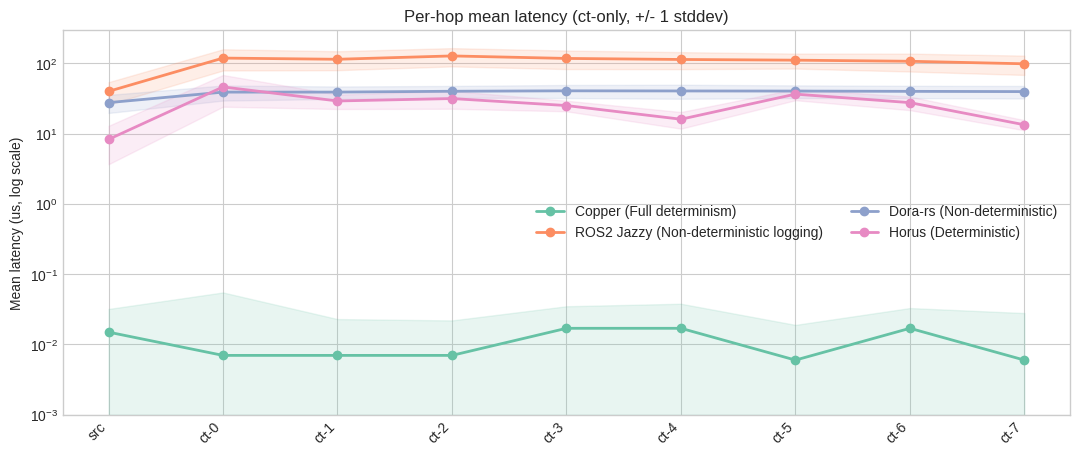

In [3]:
task_order = [
    "src", "ct-0", "gpio-0", "ct-1", "gpio-1", "ct-2", "gpio-2", "ct-3", "gpio-3",
    "ct-4", "gpio-4", "ct-5", "gpio-5", "ct-6", "gpio-6", "ct-7", "gpio-7", "End2End",
]

systems = list(raw_tables.keys())
colors = {system: color for system, color in zip(systems, plt.cm.Set2.colors)}


def series_for(system, metric, tasks):
    data = {row["task"]: row[f"{metric}_us"] for row in rows if row["system"] == system}
    return np.array([data[t] for t in tasks], dtype=float)


task_order_hops = [t for t in task_order if t not in ("End2End",) and not t.startswith("gpio-") ]

x = np.arange(len(task_order_hops))
fig, ax = plt.subplots(figsize=(13, 5))

for system in systems:
    mean = series_for(system, "mean", task_order_hops)
    std = series_for(system, "stddev", task_order_hops)
    low = np.maximum(mean - std, 1e-3)
    high = mean + std
    ax.plot(x, mean, marker="o", linewidth=2, label=system, color=colors[system])
    ax.fill_between(x, low, high, color=colors[system], alpha=0.15)

ax.set_xticks(x)
ax.set_xticklabels(task_order_hops, rotation=45, ha="right")
ax.set_yscale("log")
ax.set_ylim(1e-3, None)
ax.set_ylabel("Mean latency (us, log scale)")
ax.set_title("Per-hop mean latency (ct-only, +/- 1 stddev)")
ax.legend(ncol=2, frameon=False)
plt.show()


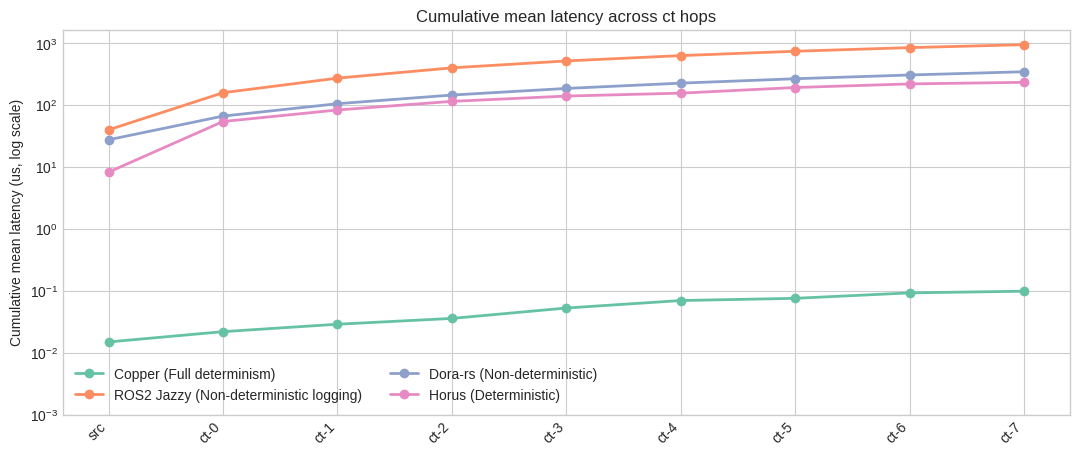

In [4]:
fig, ax = plt.subplots(figsize=(13, 5))

x = np.arange(len(task_order_hops))
for system in systems:
    mean = series_for(system, "mean", task_order_hops)
    cumulative = np.cumsum(mean)
    ax.plot(x, cumulative, marker="o", linewidth=2, label=system, color=colors[system])

ax.set_xticks(x)
ax.set_xticklabels(task_order_hops, rotation=45, ha="right")
ax.set_yscale("log")
ax.set_ylim(1e-3, None)
ax.set_ylabel("Cumulative mean latency (us, log scale)")
ax.set_title("Cumulative mean latency across ct hops")
ax.legend(ncol=2, frameon=False)
plt.show()


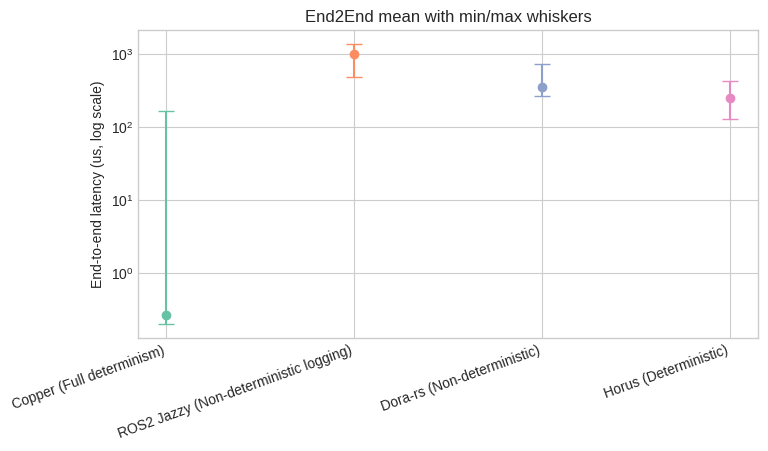

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))

x = np.arange(len(systems))
means = []
min_err = []
max_err = []

for system in systems:
    data = {row["task"]: row for row in rows if row["system"] == system}
    row = data["End2End"]
    mean = row["mean_us"]
    mins = row["min_us"]
    maxs = row["max_us"]
    means.append(mean)
    min_err.append(mean - mins)
    max_err.append(maxs - mean)

for i, system in enumerate(systems):
    ax.errorbar(
        x[i],
        means[i],
        yerr=[[min_err[i]], [max_err[i]]],
        fmt="o",
        capsize=6,
        color=colors[system],
    )

ax.set_xticks(x)
ax.set_xticklabels(systems, rotation=20, ha="right")
ax.set_yscale("log")
ax.set_ylabel("End-to-end latency (us, log scale)")
ax.set_title("End2End mean with min/max whiskers")
plt.show()


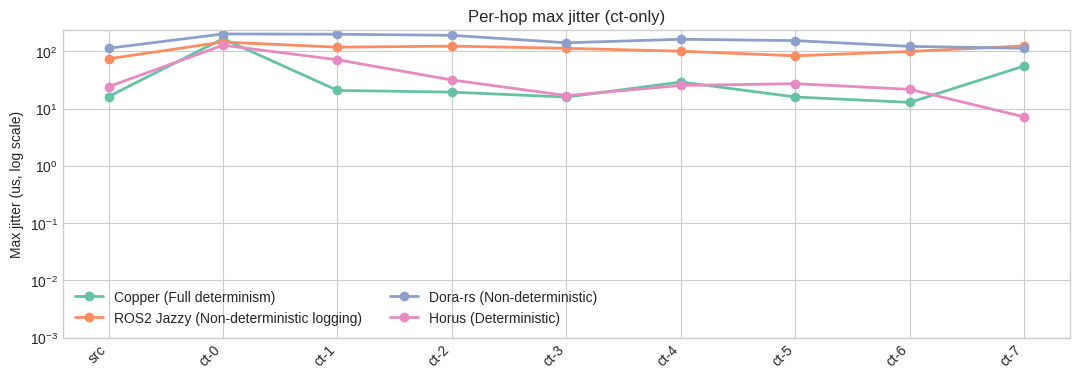

In [6]:
fig, ax = plt.subplots(figsize=(13, 4))

x = np.arange(len(task_order_hops))
for system in systems:
    max_jitter = series_for(system, "max_jitter", task_order_hops)
    ax.plot(x, max_jitter, marker="o", linewidth=2, label=system, color=colors[system])

ax.set_xticks(x)
ax.set_xticklabels(task_order_hops, rotation=45, ha="right")
ax.set_yscale("log")
ax.set_ylim(1e-3, None)
ax.set_ylabel("Max jitter (us, log scale)")
ax.set_title("Per-hop max jitter (ct-only)")
ax.legend(ncol=2, frameon=False)
plt.show()
